In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import numpy as np
import cv2
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
import shutil

In [3]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import itertools

Using TensorFlow backend.


In [4]:
!ls

base_dir				model.weights.best.hdf5
fit_gen_checkpoint.h5			nohup.out
Hisp.ipynb				README.md
Hisp Vgg.ipynb				storage
histopathologic_cancer_detection.ipynb	Whale Challenge.ipynb


In [5]:
os.path.join('storage','hisp','train_labels.csv')

'storage/hisp/train_labels.csv'

In [6]:
df = pd.read_csv(os.path.join('storage','hisp','train_labels.csv'))
df.head()
train_path = 'storage/hisp/train/'
test_path = 'storage/hisp/test/'

In [7]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [8]:
TRAIN_DIR = train_path

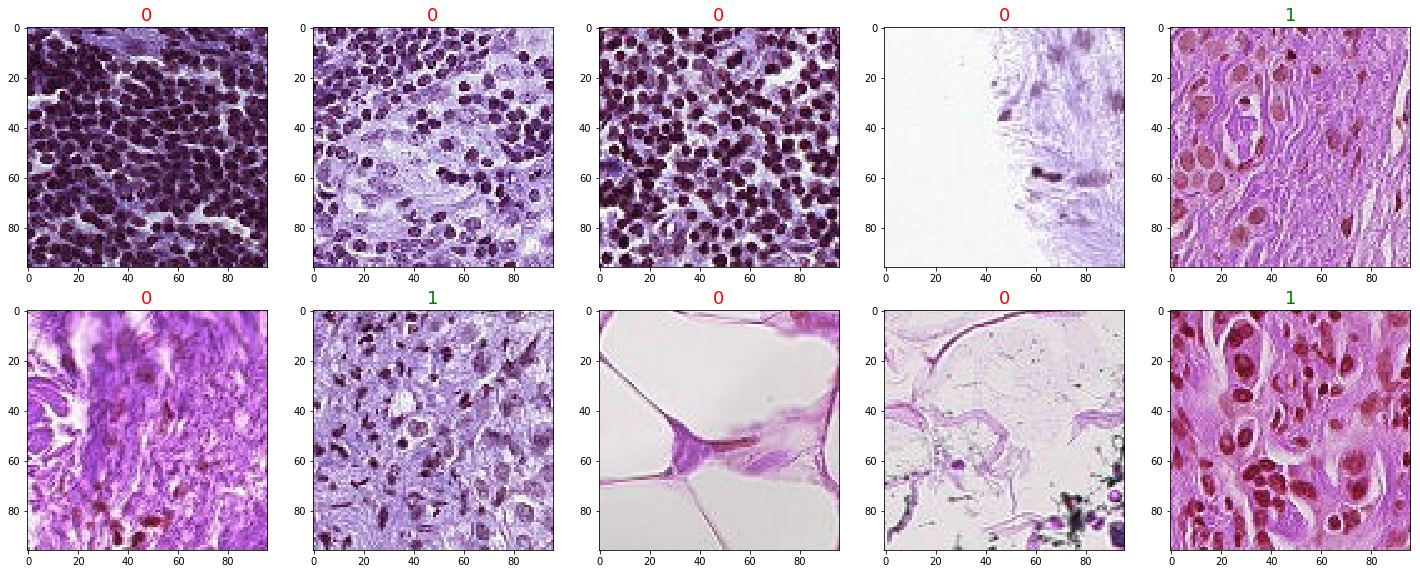

In [9]:
fig = plt.figure(figsize = (20,8))
index = 1
for i in np.random.randint(low = 0, high = df.shape[0], size = 10):
    file = TRAIN_DIR + df.iloc[i]['id'] + '.tif'
    img = cv2.imread(file)
    ax = fig.add_subplot(2, 5, index)
    ax.imshow(img, cmap = 'gray')
    index = index + 1
    color = ['green' if df.iloc[i].label == 1 else 'red'][0]
    ax.set_title(df.iloc[i].label, fontsize = 18, color = color)
plt.tight_layout()
plt.show()

In [10]:
# removing this image because it caused a training error previously
df[df['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']

# removing this image because it's black
df[df['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [11]:
SAMPLE_SIZE = 80000
# take a random sample of class 0 with size equal to num samples in class 1
df_0 = df[df['label'] == 0].sample(SAMPLE_SIZE, random_state = 0)
# filter out class 1
df_1 = df[df['label'] == 1].sample(SAMPLE_SIZE, random_state = 0)

# concat the dataframes
df_train = pd.concat([df_0, df_1], axis = 0).reset_index(drop = True)
# shuffle
df_train = shuffle(df_train)

df_train['label'].value_counts()

1    80000
0    80000
Name: label, dtype: int64

In [12]:
# train_test_split
# stratify=y creates a balanced validation set.
y = df_train['label']

df_train, df_val = train_test_split(df_train, test_size = 0.1, random_state = 0, stratify = y)

In [ ]:
# Set the id as the index in df_data
df.set_index('id', inplace=True)

# Get a list of train and val images
train_list = list(df_train['id'])
val_list = list(df_val['id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    file_name = image + '.tif'
    # get the label for a certain image
    target = df.loc[image,'label']
    
    # these must match the folder names
    if target == 0:
        label = '0'
    elif target == 1:
        label = '1'
    
    # source path to image
    src = os.path.join(TRAIN_DIR, file_name)
    # destination path to image
    dest = os.path.join(train_dir, label, file_name)
    # copy the image from the source to the destination
    shutil.copyfile(src, dest)


# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    file_name = image + '.tif'
    # get the label for a certain image
    target = df.loc[image,'label']
    
    # these must match the folder names
    if target == 0:
        label = '0'
    elif target == 1:
        label = '1'
    

    # source path to image
    src = os.path.join(TRAIN_DIR, file_name)
    # destination path to image
    dest = os.path.join(val_dir, label, file_name)
    # copy the image from the source to the destination
    shutil.copyfile(src, dest)

In [13]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#Folder Structure

'''
    * base_dir
        |-- train_dir
            |-- 0   #No Tumor
            |-- 1   #Has Tumor
        |-- val_dir
            |-- 0
            |-- 1
'''
# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# create new folders inside train_dir
no_tumor = os.path.join(train_dir, '0')
os.mkdir(no_tumor)
has_tumor = os.path.join(train_dir, '1')
os.mkdir(has_tumor)


# create new folders inside val_dir
no_tumor = os.path.join(val_dir, '0')
os.mkdir(no_tumor)
has_tumor = os.path.join(val_dir, '1')
os.mkdir(has_tumor)


print(os.listdir('base_dir/train_dir'))
print(os.listdir('base_dir/val_dir'))

FileExistsError: [Errno 17] File exists: 'base_dir'

In [13]:
print(os.listdir('base_dir/train_dir'))
print(os.listdir('base_dir/val_dir'))

['1', '0']
['1', '0']


In [14]:
print(len(os.listdir('base_dir/train_dir/0')))
print(len(os.listdir('base_dir/train_dir/1')))

72000
72000


In [19]:
from keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 96
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'
test_path = 'storage/hisp/test/'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [15]:
def resnet_50_model():
    
    #Load the VGG model
    resnet = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(96,96, 3))
    
    # Freeze the layers except the last 4 layers# Freeze 
    for layer in resnet.layers[:-4]:
        layer.trainable = False
    
    model = tf.keras.Sequential()
    
    model.add(resnet)
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.summary()
    return model

In [16]:
model = resnet_50_model()

/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 33,026,434
Trainable params: 10,493,442
Non-trainable params: 22,532,992
_________________________________________________________________


In [17]:

optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [21]:
filepath = "fit_gen_checkpoint_3.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose = 1, 
                             save_best_only = True, mode = 'max')


# Uncomment below section if your model needs LR scheduler. 
# As we are using lr_momentum and decay we better not use LR_scheduler.

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor = 0.5, patience = 2, verbose = 1, mode = 'max', min_lr = 0.00001)                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch = train_steps, 
                    validation_data = val_gen,
                    validation_steps = val_steps,
                    epochs = 5,
                    verbose = 1,
                    callbacks = callbacks_list) #mention callbacks = callbacks_list if you use LR_scheduler


Epoch 1/5
  135/14400 [..............................] - ETA: 36:53 - loss: 0.3557 - acc: 0.8467

KeyboardInterrupt: 

In [24]:
# Load the weights with the best validation accuracy
model.load_weights('fit_gen_checkpoint.h5')



In [21]:
hisp_dict = { 0:'No Hisp', 1: 'Found Hisp' }

In [22]:
# selecting only 1000 data for MVP
df_X_test = df.sample(1000)
#train = df
df_X_test.describe()

,label
count,1000.000000
mean,0.413000
std,0.492619
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [26]:
def prepareImages(train,m):
    print("Preparing images")
    X_train = np.zeros((m, 96, 96, 3))
    count = 0
    
    for id in train['id']:
        path = os.path.join(train_path, id)
        img = image.load_img(path+'.tif')
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", id)
        count += 1
    
    return X_train

def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)

    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

def showImage(X,y,index):
    print("The class is ",y[index])
    plt.imshow(X[index])
    
def saveNpy(path, np_arr):
    np.save(path,np_arr)
    

In [27]:
X_test = prepareImages(df_X_test,len(df_X_test))


Preparing images
Processing image:  1 ,  19b321fc5ec42cb9db37ff89bcd45dcfdd745589
Processing image:  501 ,  bfd32fbad027d0739c2093aa12eb9cf8e9e5038b


NameError: name 'v' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1000, 96, 96, 3)
The class is  [1. 0.]


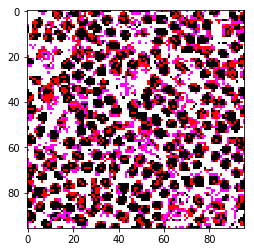

In [28]:
labels = df_X_test['label']
y_test, label_encoder = prepare_labels(labels)
print(X_test.shape)
showImage(X_test,y_test,100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

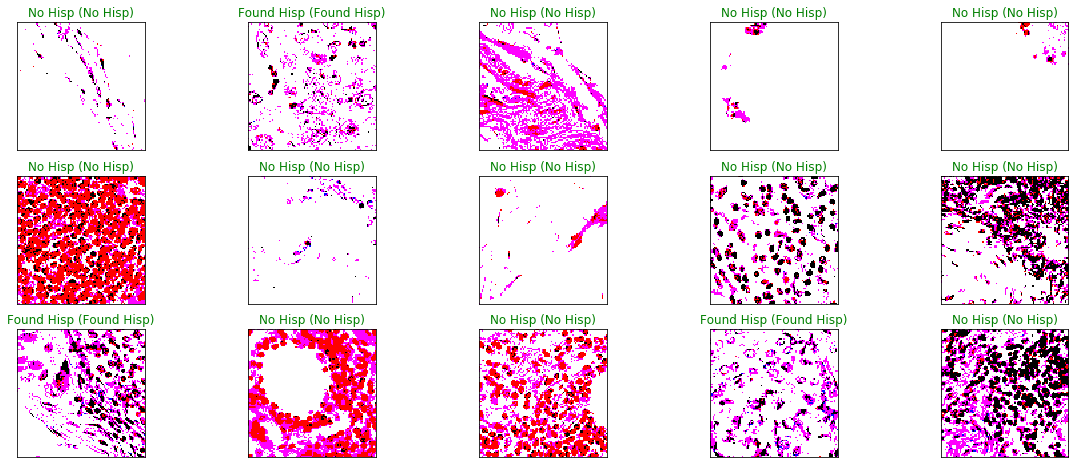

In [29]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(hisp_dict[predict_index], 
                                  hisp_dict[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

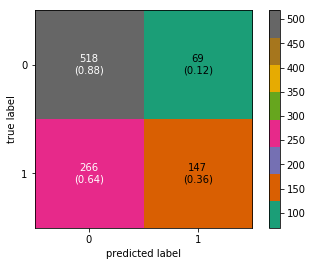

In [30]:
y_pred = model.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix
# For this to work we need y_pred as binary labels not as probabilities

cm = confusion_matrix(y_true, y_pred_binary)

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               cmap = 'Dark2')
plt.show()

In [31]:
from sklearn.metrics import classification_report
# Generate a classification report

report = classification_report(y_true, y_pred_binary, target_names = ['no_tumor', 'has_tumor'])
print(report)

             precision    recall  f1-score   support

   no_tumor       0.66      0.88      0.76       587
  has_tumor       0.68      0.36      0.47       413

avg / total       0.67      0.67      0.64      1000



In [22]:
#Folder Structure

'''
    * test_dir
        |-- test_images
'''

# We will be feeding test images from a folder into predict_generator().

# create test_dir
test_dir = 'test_dir'
os.mkdir(test_dir)
    
# create test_images inside test_dir
test_images = os.path.join(test_dir, 'test_images')
os.mkdir(test_images)

# check that the directory we created exists
os.listdir('test_dir')


['test_images']

In [ ]:
# Transfer the test images into image_dir
test_list = os.listdir('../input/test')

for image in test_list:    
    fname = image
    # source path to image
    src = os.path.join('../input/test', fname)
    # destination path to image
    dst = os.path.join(test_images, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
print('Total Test Images = ',len(os.listdir('test_dir/test_images')))

In [ ]:
# Transfer the test images into image_dir
# test_list = os.listdir('../input/test')

# for image in test_list:    
#     fname = image
#     # source path to image
#     src = os.path.join('../input/test', fname)
#     # destination path to image
#     dst = os.path.join(test_images, fname)
#     # copy the image from the source to the destination
#     shutil.copyfile(src, dst)
# print('Total Test Images = ',len(os.listdir('test_dir/test_images')))

In [23]:
test_path ='test_dir'
test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 57458 images belonging to 1 classes.


In [25]:
num_test_images = 57458 #len(os.listdir('test_dir/test_images')

predictions = model.predict_generator(test_gen, steps=num_test_images, verbose=1)

if predictions.shape[0] == num_test_images:
    print('All Predictions Done!')
else:
    print('Error!')

57458/57458 [==============================] - 1003s 17ms/step
All Predictions Done!


In [26]:
# Put the predictions into a dataframe
df_preds = pd.DataFrame(predictions, columns=['no_tumor', 'has_tumor'])
df_preds.head()

,no_tumor,has_tumor
0,0.673522,0.326478
1,0.671372,0.328628
2,0.669798,0.330202
3,0.693782,0.306218
4,0.669262,0.330738


In [27]:
# This outputs the file names in the sequence in which the generator processed the test images.
test_filenames = test_gen.filenames

# add the filenames to the dataframe
df_preds['file_names'] = test_filenames

# Create an id column
# A file name now has this format: 
# images/00006537328c33e284c973d7b39d340809f7271b.tif

# This function will extract the id:
# 00006537328c33e284c973d7b39d340809f7271b
def extract_id(x):
    
    # split into a list
    a = x.split('/')
    # split into a list
    b = a[1].split('.')
    extracted_id = b[0]
    
    return extracted_id

df_preds['id'] = df_preds['file_names'].apply(extract_id)

df_preds.head()

,no_tumor,has_tumor,file_names,id
0,0.673522,0.326478,test_images/00006537328c33e284c973d7b39d340809...,00006537328c33e284c973d7b39d340809f7271b
1,0.671372,0.328628,test_images/0000ec92553fda4ce39889f9226ace43ca...,0000ec92553fda4ce39889f9226ace43cae3364e
2,0.669798,0.330202,test_images/00024a6dee61f12f7856b0fc6be20bc7a4...,00024a6dee61f12f7856b0fc6be20bc7a48ba3d2
3,0.693782,0.306218,test_images/000253dfaa0be9d0d100283b22284ab2f6...,000253dfaa0be9d0d100283b22284ab2f6b643f6
4,0.669262,0.330738,test_images/000270442cc15af719583a8172c87cd2bd...,000270442cc15af719583a8172c87cd2bd9c7746


In [28]:
# Get the predicted labels.
# We were asked to predict a probability that the image has tumor tissue
y_pred = df_preds['has_tumor']

# get the id column
image_id = df_preds['id']

In [29]:
submission = pd.DataFrame({'id':image_id, 
                           'label':y_pred, 
                          }).set_index('id')

submission.to_csv('submission.csv', columns=['label'])

In [30]:
submission.head()

,label
id,
00006537328c33e284c973d7b39d340809f7271b,0.326478
0000ec92553fda4ce39889f9226ace43cae3364e,0.328628
00024a6dee61f12f7856b0fc6be20bc7a48ba3d2,0.330202
000253dfaa0be9d0d100283b22284ab2f6b643f6,0.306218
000270442cc15af719583a8172c87cd2bd9c7746,0.330738
